In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
weather_2012 = pd.read_csv('pandas-cookbook-master/data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## 6.1 Operações de String
Você verá que a coluna 'Tempo' tem uma descrição de texto do tempo que estava acontecendo a cada hora. Assumiremos que está nevando se a descrição do texto contiver "Neve".

In [5]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

In [6]:
weather_description

Date/Time
2012-01-01 00:00:00                     Fog
2012-01-01 01:00:00                     Fog
2012-01-01 02:00:00    Freezing Drizzle,Fog
2012-01-01 03:00:00    Freezing Drizzle,Fog
2012-01-01 04:00:00                     Fog
                               ...         
2012-12-31 19:00:00                    Snow
2012-12-31 20:00:00                    Snow
2012-12-31 21:00:00                    Snow
2012-12-31 22:00:00                    Snow
2012-12-31 23:00:00                    Snow
Name: Weather, Length: 8784, dtype: object

`is_snowing` é um vetor binário que relaciona a data e hora com o estado de nevando ou não.

In [8]:
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

<Axes: xlabel='Date/Time'>

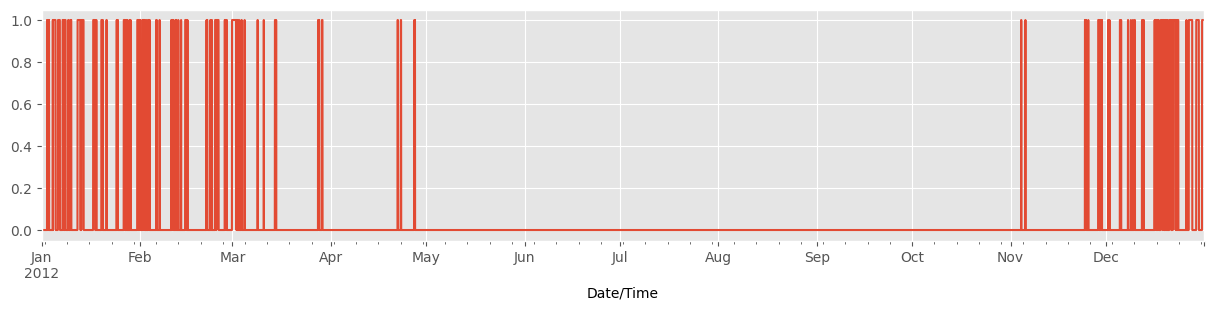

In [9]:
# Mais usável
is_snowing = is_snowing.astype(float)
is_snowing.plot()

## 6.2 Usando a reamostragem para encontrar o mês com mais neve
Se quiséssemos a temperatura média a cada mês, poderíamos usar o `resample()` método assim:



<Axes: xlabel='Date/Time'>

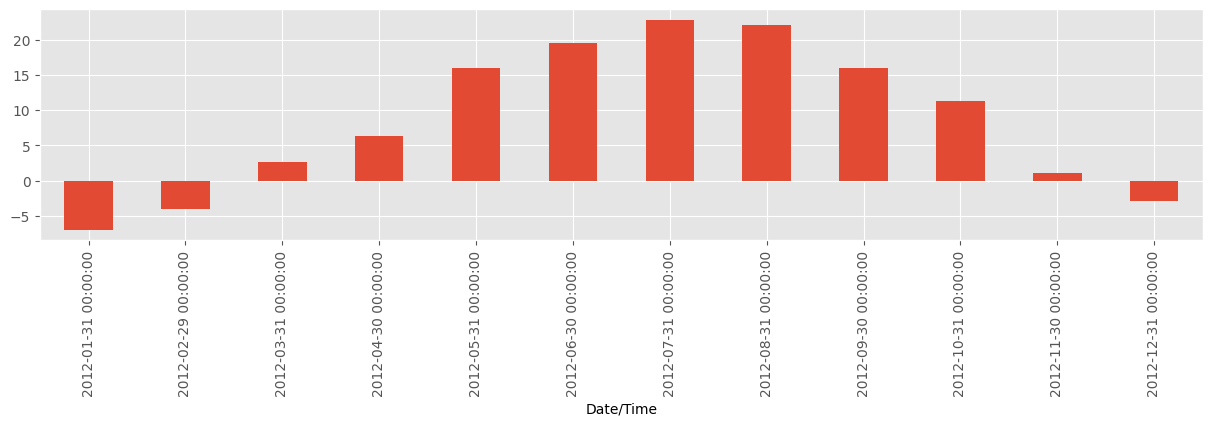

In [10]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

In [11]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

e, em seguida, use `resample` para encontrar a porcentagem de tempo que estava nevando a cada mês



In [12]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

<Axes: xlabel='Date/Time'>

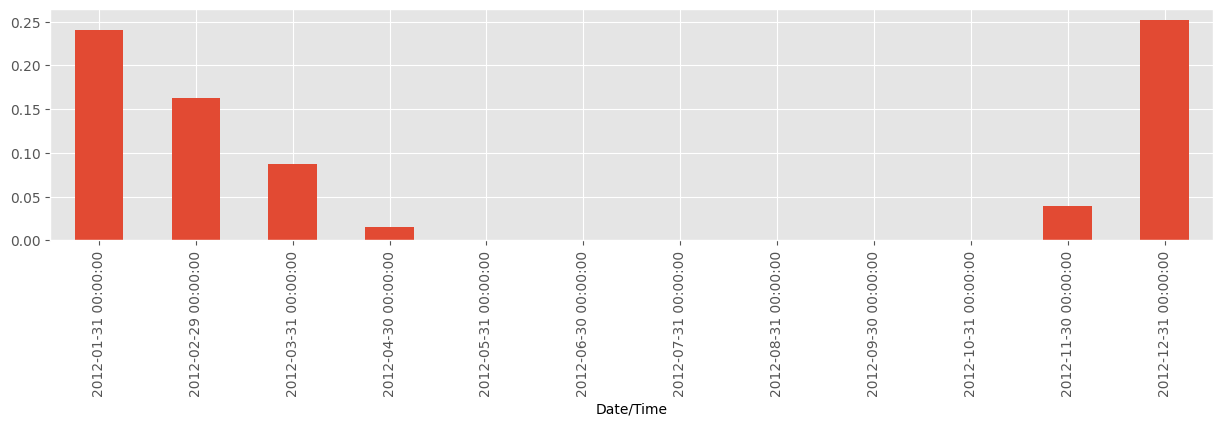

In [13]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

## 6.3 Traçano estatísiticas de temperatura e neve junta
Também podemos combinar essas duas estatísticas (temperatura e neve) em um quadro de dados e plotá-los juntos:



In [14]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Nome da coluna
temperature.name = "Temperatura"
snowiness.name = "Snowiness"

Usaremos `concat` novamente para combinar as duas estatísticas em um único dataframe.



In [15]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperatura,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


<Axes: xlabel='Date/Time'>

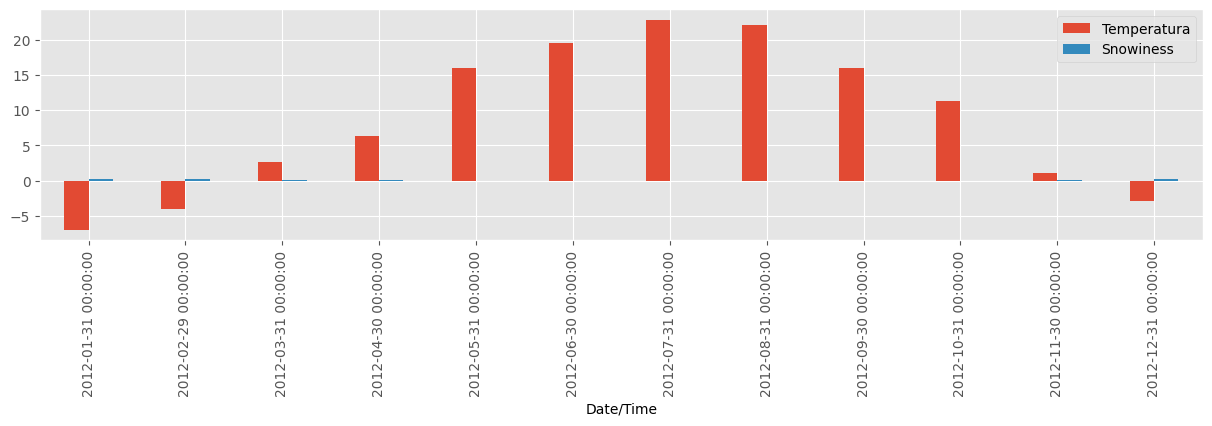

In [16]:
stats.plot(kind='bar')

Uh, isso não funcionou muito bem porque a escala estava errada. Podemos fazer melhor plotando-os em dois gráficos separados:

array([<Axes: title={'center': 'Temperatura'}, xlabel='Date/Time'>,
       <Axes: title={'center': 'Snowiness'}, xlabel='Date/Time'>],
      dtype=object)

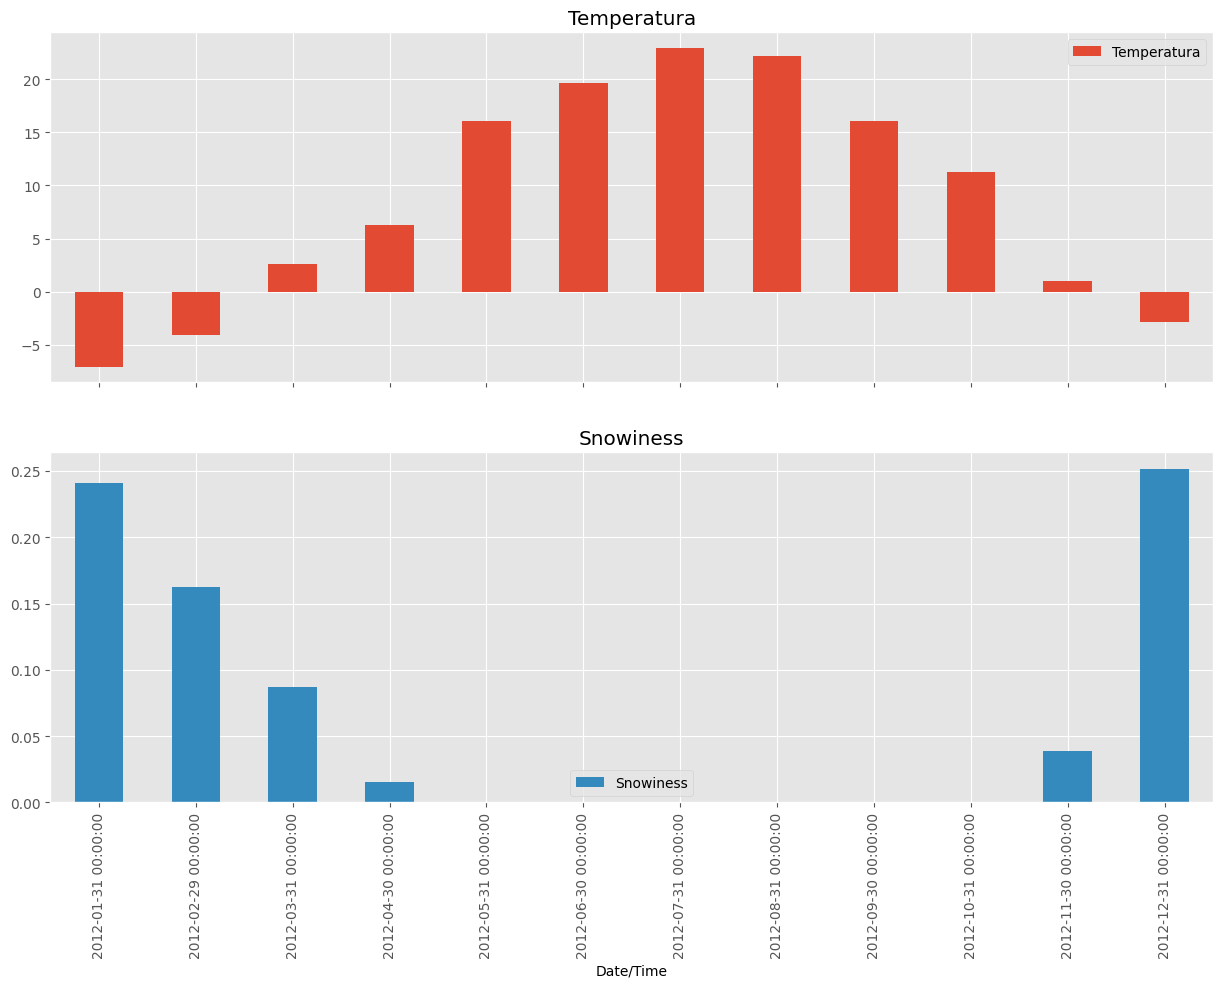

In [17]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

## OBS: Colocando nome nos meses:

In [35]:
temperature.index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
snowiness.index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [34]:
temperature

Janeiro      -7.05
Fevereiro    -4.10
Março         2.60
Abril         6.30
Maio         16.05
Junho        19.60
Julho        22.90
Agosto       22.20
Setembro     16.10
Outubro      11.30
Novembro      1.05
Dezembro     -2.85
Name: Temperatura, dtype: float64

<Axes: >

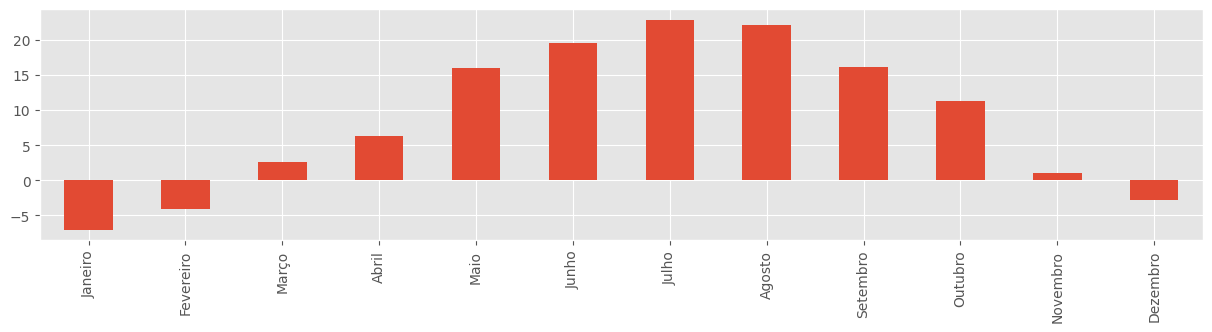

In [38]:
temperature.plot(kind='bar')

<Axes: >

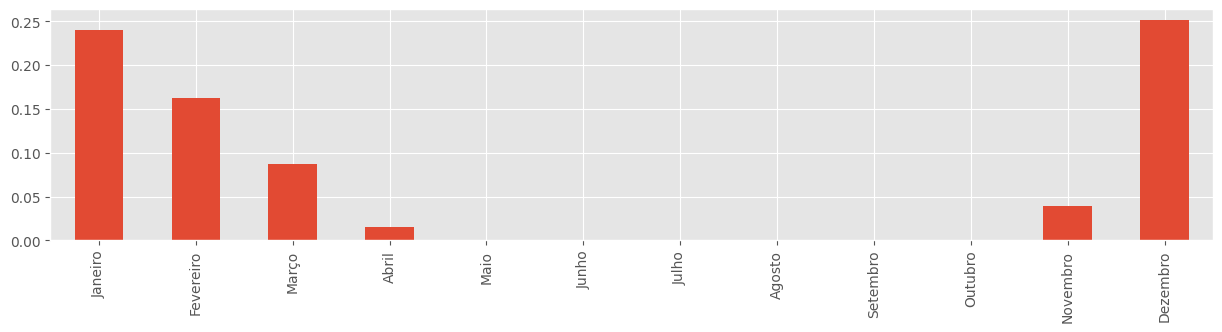

In [39]:
snowiness.plot(kind='bar')

In [40]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperatura,Snowiness
Janeiro,-7.05,0.240591
Fevereiro,-4.10,0.162356
Março,2.60,0.087366
Abril,6.30,0.015278
Maio,16.05,0.000000
Junho,19.60,0.000000
Julho,22.90,0.000000
Agosto,22.20,0.000000
Setembro,16.10,0.000000
Outubro,11.30,0.000000


Finalmente...

array([<Axes: title={'center': 'Temperatura'}>,
       <Axes: title={'center': 'Snowiness'}>], dtype=object)

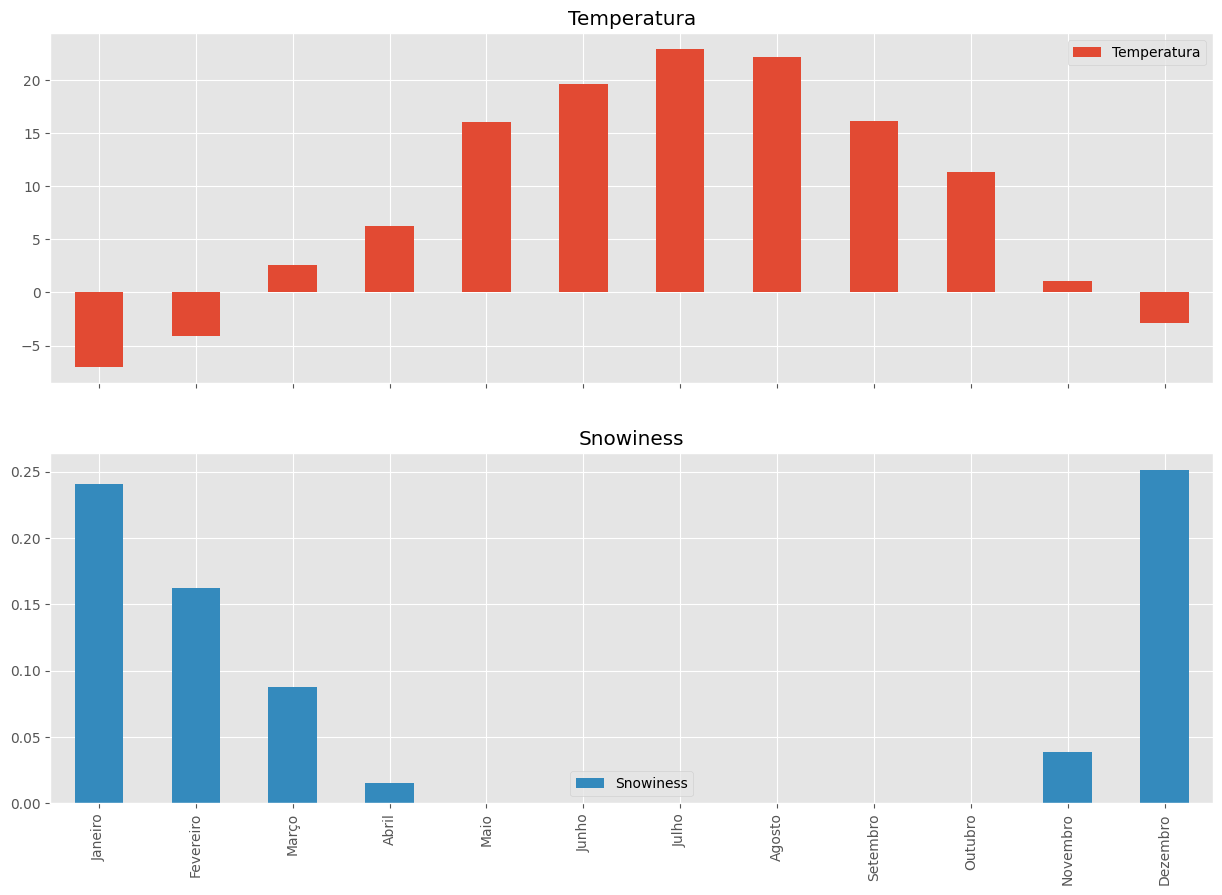

In [43]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))